In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
#------------Descarga de dataset------------#
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
#------------Modelo autoencoder------------#

encoder_input = keras.Input(shape=(28,28,1), name = "ae_input")
flat = keras.layers.Flatten()(encoder_input) #Aplana los valores
h_layer1 = keras.layers.Dense(588, activation="relu")(flat)
h_layer2 = keras.layers.Dense(392, activation="relu")(h_layer1)
h_layer3 = keras.layers.Dense(196, activation="relu")(h_layer2)
h_layer4 = keras.layers.Dense(5, activation="relu")(h_layer3)

encoder = keras.Model(encoder_input, h_layer4, name="encoder") #Modelo encoder para poder visualizar imagen de 5 dimensiones

h_layer5 = keras.layers.Dense(196, activation="relu")(h_layer4)
h_layer6 = keras.layers.Dense(392, activation="relu")(h_layer5)
h_layer7 = keras.layers.Dense(588, activation="relu")(h_layer6)

h_layer8 = keras.layers.Dense(784, activation="relu")(h_layer7)

#En este paso de vuelve a tener un vector de valores de 28x28x1

decoder_output = keras.layers.Reshape((28,28,1))(h_layer8)

opt = keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)

autoencoder = keras.Model(encoder_input, decoder_output, name = "autoencoder") #Creación modelo autoencoder
autoencoder.summary()


Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 588)               461580    
                                                                 
 dense_9 (Dense)             (None, 392)               230888    
                                                                 
 dense_10 (Dense)            (None, 196)               77028     
                                                                 
 dense_11 (Dense)            (None, 5)                 985       
                                                                 
 dense_12 (Dense)            (None, 196)               

In [ ]:
autoencoder.compile(opt, loss="mse")

In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 44s 25ms/step - loss: 0.0354 - val_loss: 0.0287
Epoch 2/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0278 - val_loss: 0.0266
Epoch 3/50
1688/1688 [==============================] - 43s 25ms/step - loss: 0.0256 - val_loss: 0.0247
Epoch 4/50
1688/1688 [==============================] - 43s 26ms/step - loss: 0.0242 - val_loss: 0.0237
Epoch 5/50
1688/1688 [==============================] - 41s 24ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 6/50
1688/1688 [==============================] - 42s 25ms/step - loss: 0.0228 - val_loss: 0.0229
Epoch 7/50
1688/1688 [==============================] - 44s 26ms/step - loss: 0.0224 - val_loss: 0.0226
Epoch 8/50
1688/1688 [==============================] - 45s 27ms/step - loss: 0.0220 - val_loss: 0.0225
Epoch 9/50
1688/1688 [==============================] - 45s 26ms/step - loss: 0.0217 - val_loss: 0.0223
Epoch 10/50
1688/1688 [==============================] - 44s 26m

In [ ]:
predict_autoencoder = encoder.predict([x_test[0].reshape(-1,28,28,1)])[0]
print(predict_autoencoder)


1/1 [==============================] - 0s 21ms/step
[ 646.6637   388.8617    89.8376  1005.5409   125.09917]


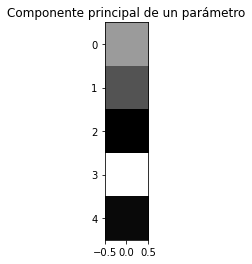

In [ ]:
plt.title("Componente principal de un parámetro")
plt.imshow(predict_autoencoder.reshape((5,1)), cmap="gray")

In [ ]:
ae_out = autoencoder.predict([x_test[100].reshape(-1,28,28,1)])[0]


1/1 [==============================] - 0s 19ms/step


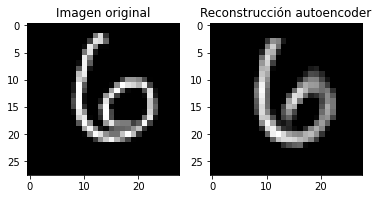

In [ ]:
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(x_test[100],cmap="gray")
plt.subplot(1,2,2)
plt.title("Reconstrucción autoencoder")
plt.imshow(ae_out.reshape(28,28),cmap="gray")

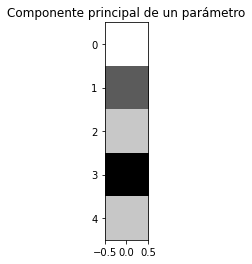

In [ ]:
#----------------Creación PCA-------------------#

from sklearn.decomposition import PCA #Descargamos PCA de lib sklearn
pca = PCA(n_components = 5) #Cantidad de componentes principales a la cual se disminuye imagen

x_train_flat = x_train.reshape((60000, 28*28))
x_test_flat = x_test.reshape((10000, 28*28))
PC_train = pca.fit_transform(x_train_flat)
PC_test = pca.fit_transform(x_test_flat)



plt.title("Componente principal de un parámetro")
plt.imshow(PC_train[0].reshape(5,1), cmap="gray")

In [ ]:
#--------------Modelo para reconstruir PCA---------------------#

decoder_input = keras.Input(shape=(5,), name = "principal_component")
h_layer1 = keras.layers.Dense(196, activation="relu")(decoder_input)
h_layer2 = keras.layers.Dense(392, activation="relu")(h_layer1)
h_layer3 = keras.layers.Dense(588, activation="relu")(h_layer2)
h_layer4 = keras.layers.Dense(784, activation="relu")(h_layer3)
decoder_output = keras.layers.Reshape((28,28,1))(h_layer4)

opt = keras.optimizers.Adam(learning_rate = 0.001, decay = 1e-6)

decoder = keras.Model(decoder_input, decoder_output, name = "decoder")

decoder.compile(opt, loss="mse")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 principal_component (InputL  [(None, 5)]              0         
 ayer)                                                           
                                                                 
 dense_104 (Dense)           (None, 196)               1176      
                                                                 
 dense_105 (Dense)           (None, 392)               77224     
                                                                 
 dense_106 (Dense)           (None, 588)               231084    
                                                                 
 dense_107 (Dense)           (None, 784)               461776    
                                                                 
 reshape_9 (Reshape)         (None, 28, 28, 1)         0         
                                                           

In [ ]:
decoder.fit(PC_train, x_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 26s 15ms/step - loss: 0.0379 - val_loss: 0.0345
Epoch 2/5
1688/1688 [==============================] - 25s 15ms/step - loss: 0.0345 - val_loss: 0.0335
Epoch 3/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0337 - val_loss: 0.0329
Epoch 4/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0333 - val_loss: 0.0328
Epoch 5/5
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0330 - val_loss: 0.0326


In [ ]:
predict = decoder.predict(PC_test)


313/313 [==============================] - 1s 5ms/step


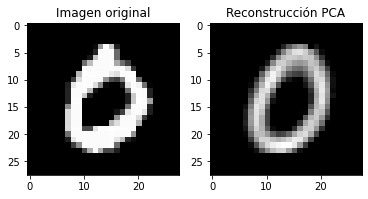

In [ ]:
plt.subplot(1,2,1)
plt.title("Imagen original")
plt.imshow(x_test[3], cmap="gray")
plt.subplot(1,2,2)
plt.title("Reconstrucción PCA")
plt.imshow(predict[3].reshape(28,28),cmap="gray")


Para ambas implementaciones se encuentra que el autoencoder predice las imágenes del dataset de manera efectiva. Además se tiene que la implementación de PCA no es muy eficiente, pudiendo reconstruir solo algunas de las imágenes.
